In [26]:
import pandas as pd
import numpy as np
from sklearn import metrics
import math
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [27]:
df = pd.read_csv('autoinsure.csv')
df.info()
df.head(10)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       63 non-null     int64  
 1   Y       63 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 1.1 KB


,X,Y
0,108,392.5
1,19,46.2
2,13,15.7
3,124,422.2
4,40,119.4
5,57,170.9
6,23,56.9
7,14,77.5
8,45,214.0
9,10,65.3


In [28]:
 #: means all rows , select all data expect last one
 # all rows and only take last conlumns
#values means convets this into a numpy array ,which format for MLmodels
X= df.iloc[:,:-1].values
y= df.iloc[:,-1].values

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
y_pred = model.predict(X)
model_details = model.summary()
print(model_details)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     305.0
Date:                Thu, 25 Sep 2025   Prob (F-statistic):           2.05e-25
Time:                        06:47:14   Log-Likelihood:                -314.04
No. Observations:                  63   AIC:                             632.1
Df Residuals:                      61   BIC:                             636.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         19.9945      6.368      3.140      0.0

Intercept:  16.75023759857538
Coefficient:  [0.         3.42923429]
    Actual   Predicted
0    244.6  198.499655
1    137.9   99.051861
2    392.5  387.107541
3    152.8  143.631906
4    170.9  212.216592
5    217.6  225.933529
6    134.9   99.051861
7     23.5   54.471815
8     77.5   40.754878
9     95.5   64.759518
10   133.3  116.198032
11    65.3   51.042581
12    89.9   61.330283
Mean Squared Error: 875.0434234424164
Mean Absolute Error: 26.414909339960463
R^2: 0.89508194939184
RMSE:  29.581132896534175
RMSE (Normalised):  0.08016567180632568
    Actual  Predicted
0    244.6     84.992
1    137.9     84.992
2    392.5     84.992
3    152.8     84.992
4    170.9     84.992
5    217.6     84.992
6    134.9     84.992
7     23.5     84.992
8     77.5     84.992
9     95.5     84.992
10   133.3     84.992
11    65.3     84.992
12    89.9     84.992
Mean Squared Error: 12429.406156307694
Mean Absolute Error: 77.58892307692308
R^2: 0.89508194939184
RMSE:  111.48724660833496
RMSE (Norm

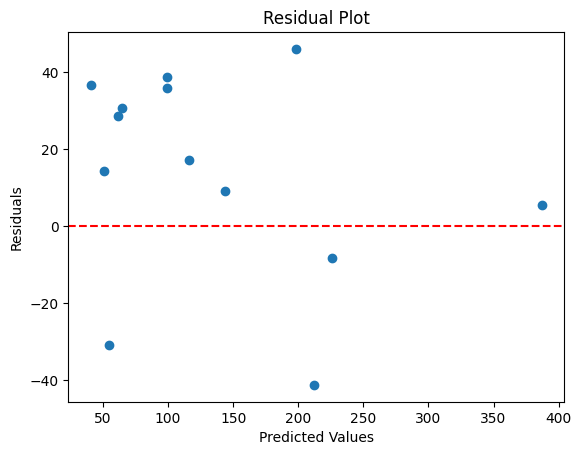

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     305.0
Date:                Thu, 25 Sep 2025   Prob (F-statistic):           2.05e-25
Time:                        06:48:02   Log-Likelihood:                -314.04
No. Observations:                  63   AIC:                             632.1
Df Residuals:                      61   BIC:                             636.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         19.9945      6.368      3.140      0.0

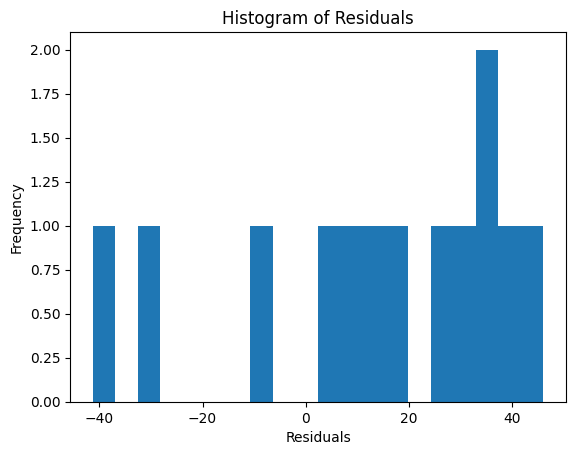

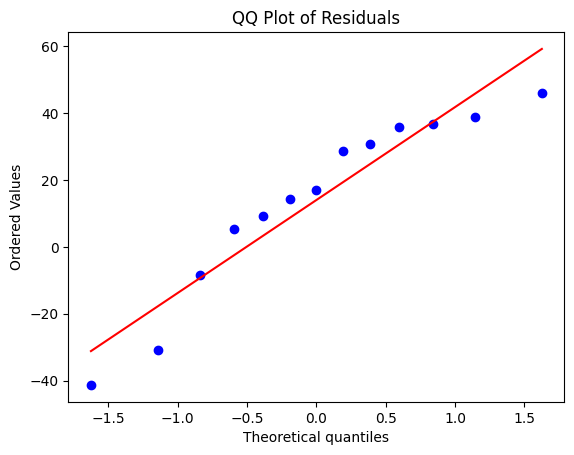

In [31]:
 #1. splits the data into training and testing sets
#20%of the data is used for testing. random_state =42 to make sure tha the splits
#is the same each time running the code, make the results reproducible

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#2. model initialization
model= LinearRegression()


#3. model training
model.fit(X_train, y_train)


#4.Printing Model Parameters:
print("Intercept: ", model.intercept_)
print("Coefficient: ", model.coef_)


#5.making predictions:

y_pred =model.predict(X_test)
df_pred = pd.DataFrame({"Actual": y_test, "Predicted": y_pred})
print(df_pred)



#6.model evaluation(MSE, MAE, R², RMSE, Normalized RMSE)
mse=mean_squared_error(y_test, y_pred)
mae=mean_absolute_error(y_test, y_pred)
r2=r2_score(y_test, y_pred)
#Calculates the Root Mean Squared Error (RMSE)
rmse=np.sqrt(mse)


#Calculates the Normalized RMSE
y_max=y_test.max()
y_min=y_test.min()
rmse_norm = rmse / (y_max - y_min)

print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R^2: {r2}")
print("RMSE: ", rmse)
print("RMSE (Normalised): ", rmse_norm)

#7.COMPARE THE PERFORMANCE OF THE LINEAR REGRESSION MODEL VS.
#A DUMMY MODEL (BASELINE) THAT USES MEAN AS THE BASIS OF ITS PREDICTION

y_mean = np.mean(y_train)
y_pred_base = np.full_like(y_test, y_mean)
df_base_pred = pd.DataFrame({"Actual": y_test, "Predicted": y_pred_base})
print(df_base_pred)

# Compute standard performance metrics of the baseline model:

# Mean Absolute Error
mae = metrics.mean_absolute_error(y_test, y_pred_base)
# Mean Squared Error
mse = metrics.mean_squared_error(y_test, y_pred_base)
# Root Mean Square Error
rmse =  math.sqrt(metrics.mean_squared_error(y_test, y_pred_base))

# Normalised Root Mean Square Error
y_max = y.max()
y_min = y.min()
rmse_norm = rmse / (y_max - y_min)

# R-Squared
r_2 = metrics.r2_score(y_test, y_pred_base)

print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R^2: {r2}")
print("RMSE: ", rmse)
print("RMSE (Normalised): ", rmse_norm)


#8. residual plots
#The code generates two plots to visualize the residuals
 #(the differences between the actual and predicted values):

residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()


#9. OLS analysis with statsmodels
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
y_pred = model.predict(X)
model_details = model.summary()
print(model_details)

#10.histogram of the residuals to check their distribution.
plt.hist(residuals, bins=20)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Histogram of Residuals")
plt.show()
#qq plots
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("QQ Plot of Residuals")
plt.show()